# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from datetime import date
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Code found https://www.programiz.com/python-programming/datetime/current-datetime
# Finding current date for later plots.
today = date.today()
curr_date = today.strftime("%b-%d-%Y")

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=150)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=150)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

113

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
# Set empty lists to hold characters height and mass
new_cities = []
latitudes = []
longitudes = []
max_temps = []
humidity = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

output_file = "C://Python-API-Challenge/WeatherPy/Output_Data/city_log.txt"

with open(output_file, "w") as datafile:

    # Loop through each city
    for city in cities:
    
        # Create search query, make request and store in json
        query = f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(query)
        response_json = response.json()
    
        # Try to grab the height and mass of characters if they are available in the Star Wars API
        try:
        
            latitudes.append(response_json['coord']['lat'])
            longitudes.append(response_json['coord']['lon'])
            max_temps.append(response_json['main']['temp_max'])
            humidity.append(response_json['main']['humidity'])
            cloudiness.append(response_json['clouds']['all'])
            wind_speeds.append(response_json['wind']['speed'])
            countries.append(response_json['sys']['country'])
            dates.append(response_json['dt'])
            city_id = response_json['id']
            new_cities.append(city)
        
            datafile.write(f"City ID: {city_id}\n")
            datafile.write(f"City Name: {city}\n\n")
        
            print(f"{city_id} {city} was found\n")
        
        # Handle exceptions for a character that is not available in the Star Wars API
        except KeyError:
        
            datafile.write(f"{city} not found\n\n")
            print(f"{city} not found\n")
            continue

    datafile.write(f"Number of cities found: {len(new_cities)}")
    print(f"Number of cities found: {len(new_cities)}")

5880054 barrow was found

3369157 cape town was found

taolanaro not found

1586443 ca mau was found

1526041 atasu was found

kazalinsk not found

3372707 ribeira grande was found

3445026 vila velha was found

7671223 kloulklubed was found

3377301 mabaruma was found

2015306 tiksi was found

2063039 port keats was found

3874787 punta arenas was found

2501152 constantine was found

3883457 lebu was found

964432 port alfred was found

2110227 butaritari was found

4020109 atuona was found

934322 mahebourg was found

2206939 bluff was found

2026160 borogontsy was found

1805733 jinchang was found

2126123 chokurdakh was found

3652764 puerto ayora was found

2013279 vostok was found

777019 vardo was found

293842 gat was found

113636 tafresh was found

1282256 hithadhoo was found

1267776 kargil was found

780687 berlevag was found

6201424 mataura was found

3347019 namibe was found

2112309 katsuura was found

2233704 bonaberi was found

4986020 big rapids was found

2155415 n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
weather_dict = {
    "City": new_cities,
    "Lat": latitudes,
    "Lng": longitudes,
    "Max Temp" : max_temps,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speeds,
    "Country" : countries,
    "Date" : dates
}
weather_data = pd.DataFrame(weather_dict)

# Code for writing city data to csv found https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

weather_data.to_csv(path_or_buf = "C://Python-API-Challenge/WeatherPy/Output_Data/new_cities.csv", index = False)

weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.29,-156.79,-18.40,68,20,14.99,US,1609453449
1,cape town,-33.93,18.42,66.00,59,40,13.87,ZA,1609453394
2,ca mau,9.18,105.15,71.33,84,94,5.55,VN,1609453556
3,atasu,48.68,71.64,3.38,94,100,3.69,KZ,1609453556
4,ribeira grande,38.52,-28.70,59.00,87,75,19.46,PT,1609453439
...,...,...,...,...,...,...,...,...,...
97,huntsville,34.73,-86.59,57.00,81,90,9.17,US,1609453371
98,mar del plata,-38.00,-57.56,68.00,49,0,13.87,AR,1609453336
99,morgan city,29.70,-91.21,73.40,94,90,13.87,US,1609453579
100,alexandria,31.22,29.96,60.80,72,20,4.70,EG,1609453249


In [72]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,21.403235,25.540490,43.225490,75.901961,55.500000,9.270588,1.609453e+09
std,38.172397,94.756361,35.710949,16.872562,39.995482,6.212736,1.086230e+02
min,-54.800000,-159.320000,-42.120000,22.000000,0.000000,0.960000,1.609453e+09
25%,-14.962500,-62.195000,20.300000,69.000000,20.000000,4.107500,1.609453e+09
50%,26.960000,30.375000,57.000000,78.500000,68.000000,7.795000,1.609454e+09
75%,56.667500,113.967500,75.182500,88.000000,98.000000,13.417500,1.609454e+09
max,78.220000,178.420000,88.090000,100.000000,100.000000,28.860000,1.609454e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

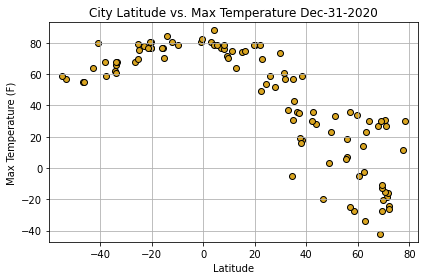

In [89]:
city_lats = weather_data['Lat']
city_max_temps = weather_data['Max Temp']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_max_temps, marker='o', facecolors='goldenrod', edgecolors='black')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_max_temps)-5, max(city_max_temps)+5)

plt.grid()

output_image = f'Output_Data/LatvTemp_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Latitude vs. Humidity Plot

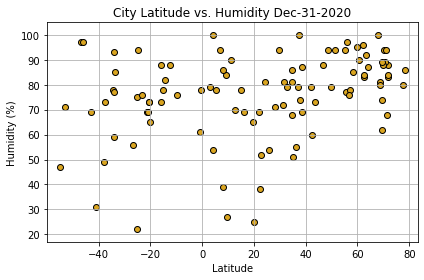

In [90]:
city_humid = weather_data['Humidity']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_humid, marker='o', facecolors='goldenrod', edgecolors='black')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_humid)-5, max(city_humid)+5)

plt.grid()

output_image = f'Output_Data/LatvHumid_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Latitude vs. Cloudiness Plot

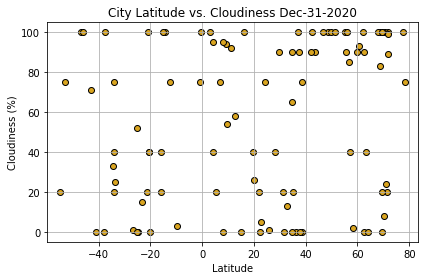

In [91]:
city_clouds = weather_data['Cloudiness']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_clouds, marker='o', facecolors='goldenrod', edgecolors='black')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_clouds)-5, max(city_clouds)+5)

plt.grid()

output_image = f'Output_Data/LatvClouds_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Latitude vs. Wind Speed Plot

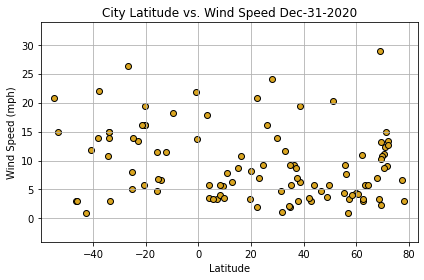

In [92]:
city_winds = weather_data['Wind Speed']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_winds, marker='o', facecolors='goldenrod', edgecolors='black')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_winds)-5, max(city_winds)+5)

plt.grid()

output_image = f'Output_Data/LatvWinds_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Linear Regression

In [93]:
north_hem_weather = weather_data.loc[weather_data['Lat'] >= 0]
south_hem_weather = weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8379878585492845


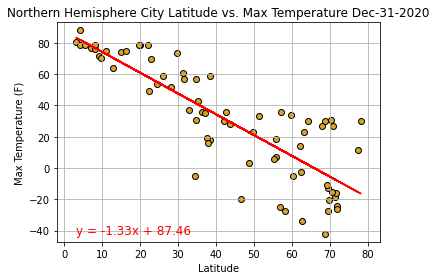

In [98]:
north_city_lats = north_hem_weather['Lat']
north_max_temps = north_hem_weather['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_max_temps)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_max_temps, marker='o', facecolors='goldenrod', edgecolors='black')
plt.plot(north_city_lats,regress_values,"r-")
plt.annotate(line_string,(min(north_city_lats),min(north_max_temps)),fontsize=12,color="red")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_max_temps)-5, max(north_max_temps)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvTemp_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8247677267389513


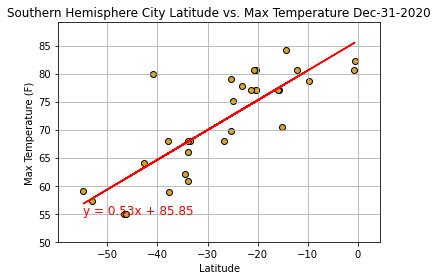

In [105]:
south_city_lats = south_hem_weather['Lat']
south_max_temps = south_hem_weather['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_max_temps)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_max_temps, marker='o', facecolors='goldenrod', edgecolors='black')
plt.plot(south_city_lats,regress_values,"r-")
plt.annotate(line_string,(min(south_city_lats),min(south_max_temps)),fontsize=12,color="red")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_max_temps)-5, max(south_max_temps)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvTemp_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.40473819803887984


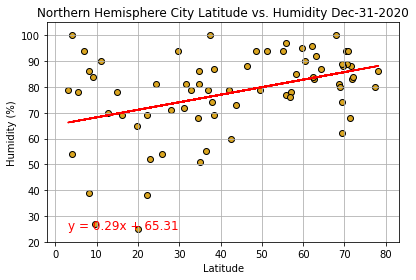

In [102]:
north_humid = north_hem_weather['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_humid)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_humid, marker='o', facecolors='goldenrod', edgecolors='black')
plt.plot(north_city_lats,regress_values,"r-")
plt.annotate(line_string,(min(north_city_lats),min(north_humid)),fontsize=12,color="red")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_humid)-5, max(north_humid)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvHumid_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1178231934286346


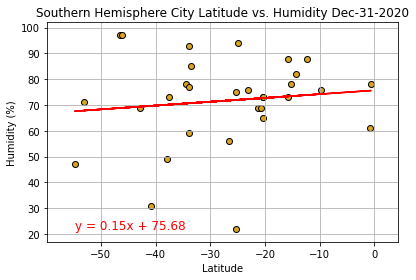

In [106]:
south_humid = south_hem_weather['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_humid)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_humid, marker='o', facecolors='goldenrod', edgecolors='black')
plt.plot(south_city_lats,regress_values,"r-")
plt.annotate(line_string,(min(south_city_lats),min(south_humid)),fontsize=12,color="red")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_humid)-5, max(south_humid)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvHumid_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18286147122309004


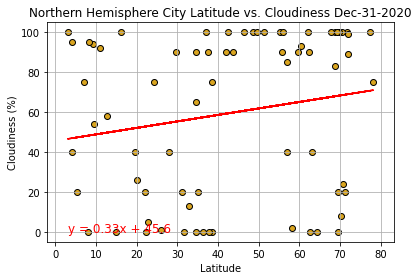

In [103]:
north_clouds = north_hem_weather['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_clouds)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_clouds, marker='o', facecolors='goldenrod', edgecolors='black')
plt.plot(north_city_lats,regress_values,"r-")
plt.annotate(line_string,(min(north_city_lats),min(north_clouds)),fontsize=12,color="red")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_clouds)-5, max(north_clouds)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvClouds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


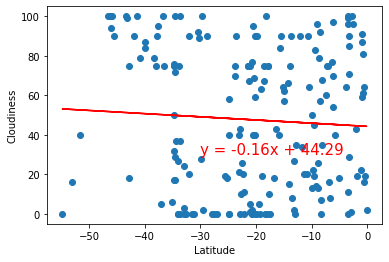

In [30]:
south_clouds = south_hem_weather['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_clouds)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_clouds, marker='o', facecolors='goldenrod', edgecolors='black')
plt.plot(south_city_lats,regress_values,"r-")
plt.annotate(line_string,(min(south_city_lats),min(south_max_temps)),fontsize=12,color="red")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_max_temps)-5, max(south_max_temps)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvTemp_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0853318913840473


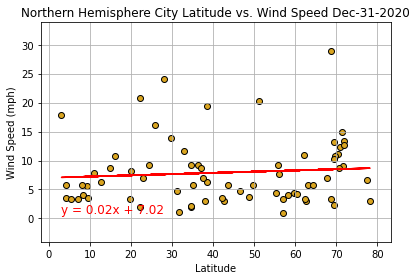

In [104]:
north_winds = north_hem_weather['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_winds)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_winds, marker='o', facecolors='goldenrod', edgecolors='black')
plt.plot(north_city_lats,regress_values,"r-")
plt.annotate(line_string,(min(north_city_lats),min(north_winds)),fontsize=12,color="red")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_winds)-5, max(north_winds)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvWinds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


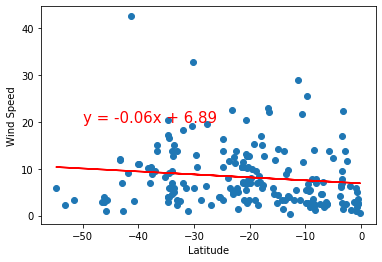